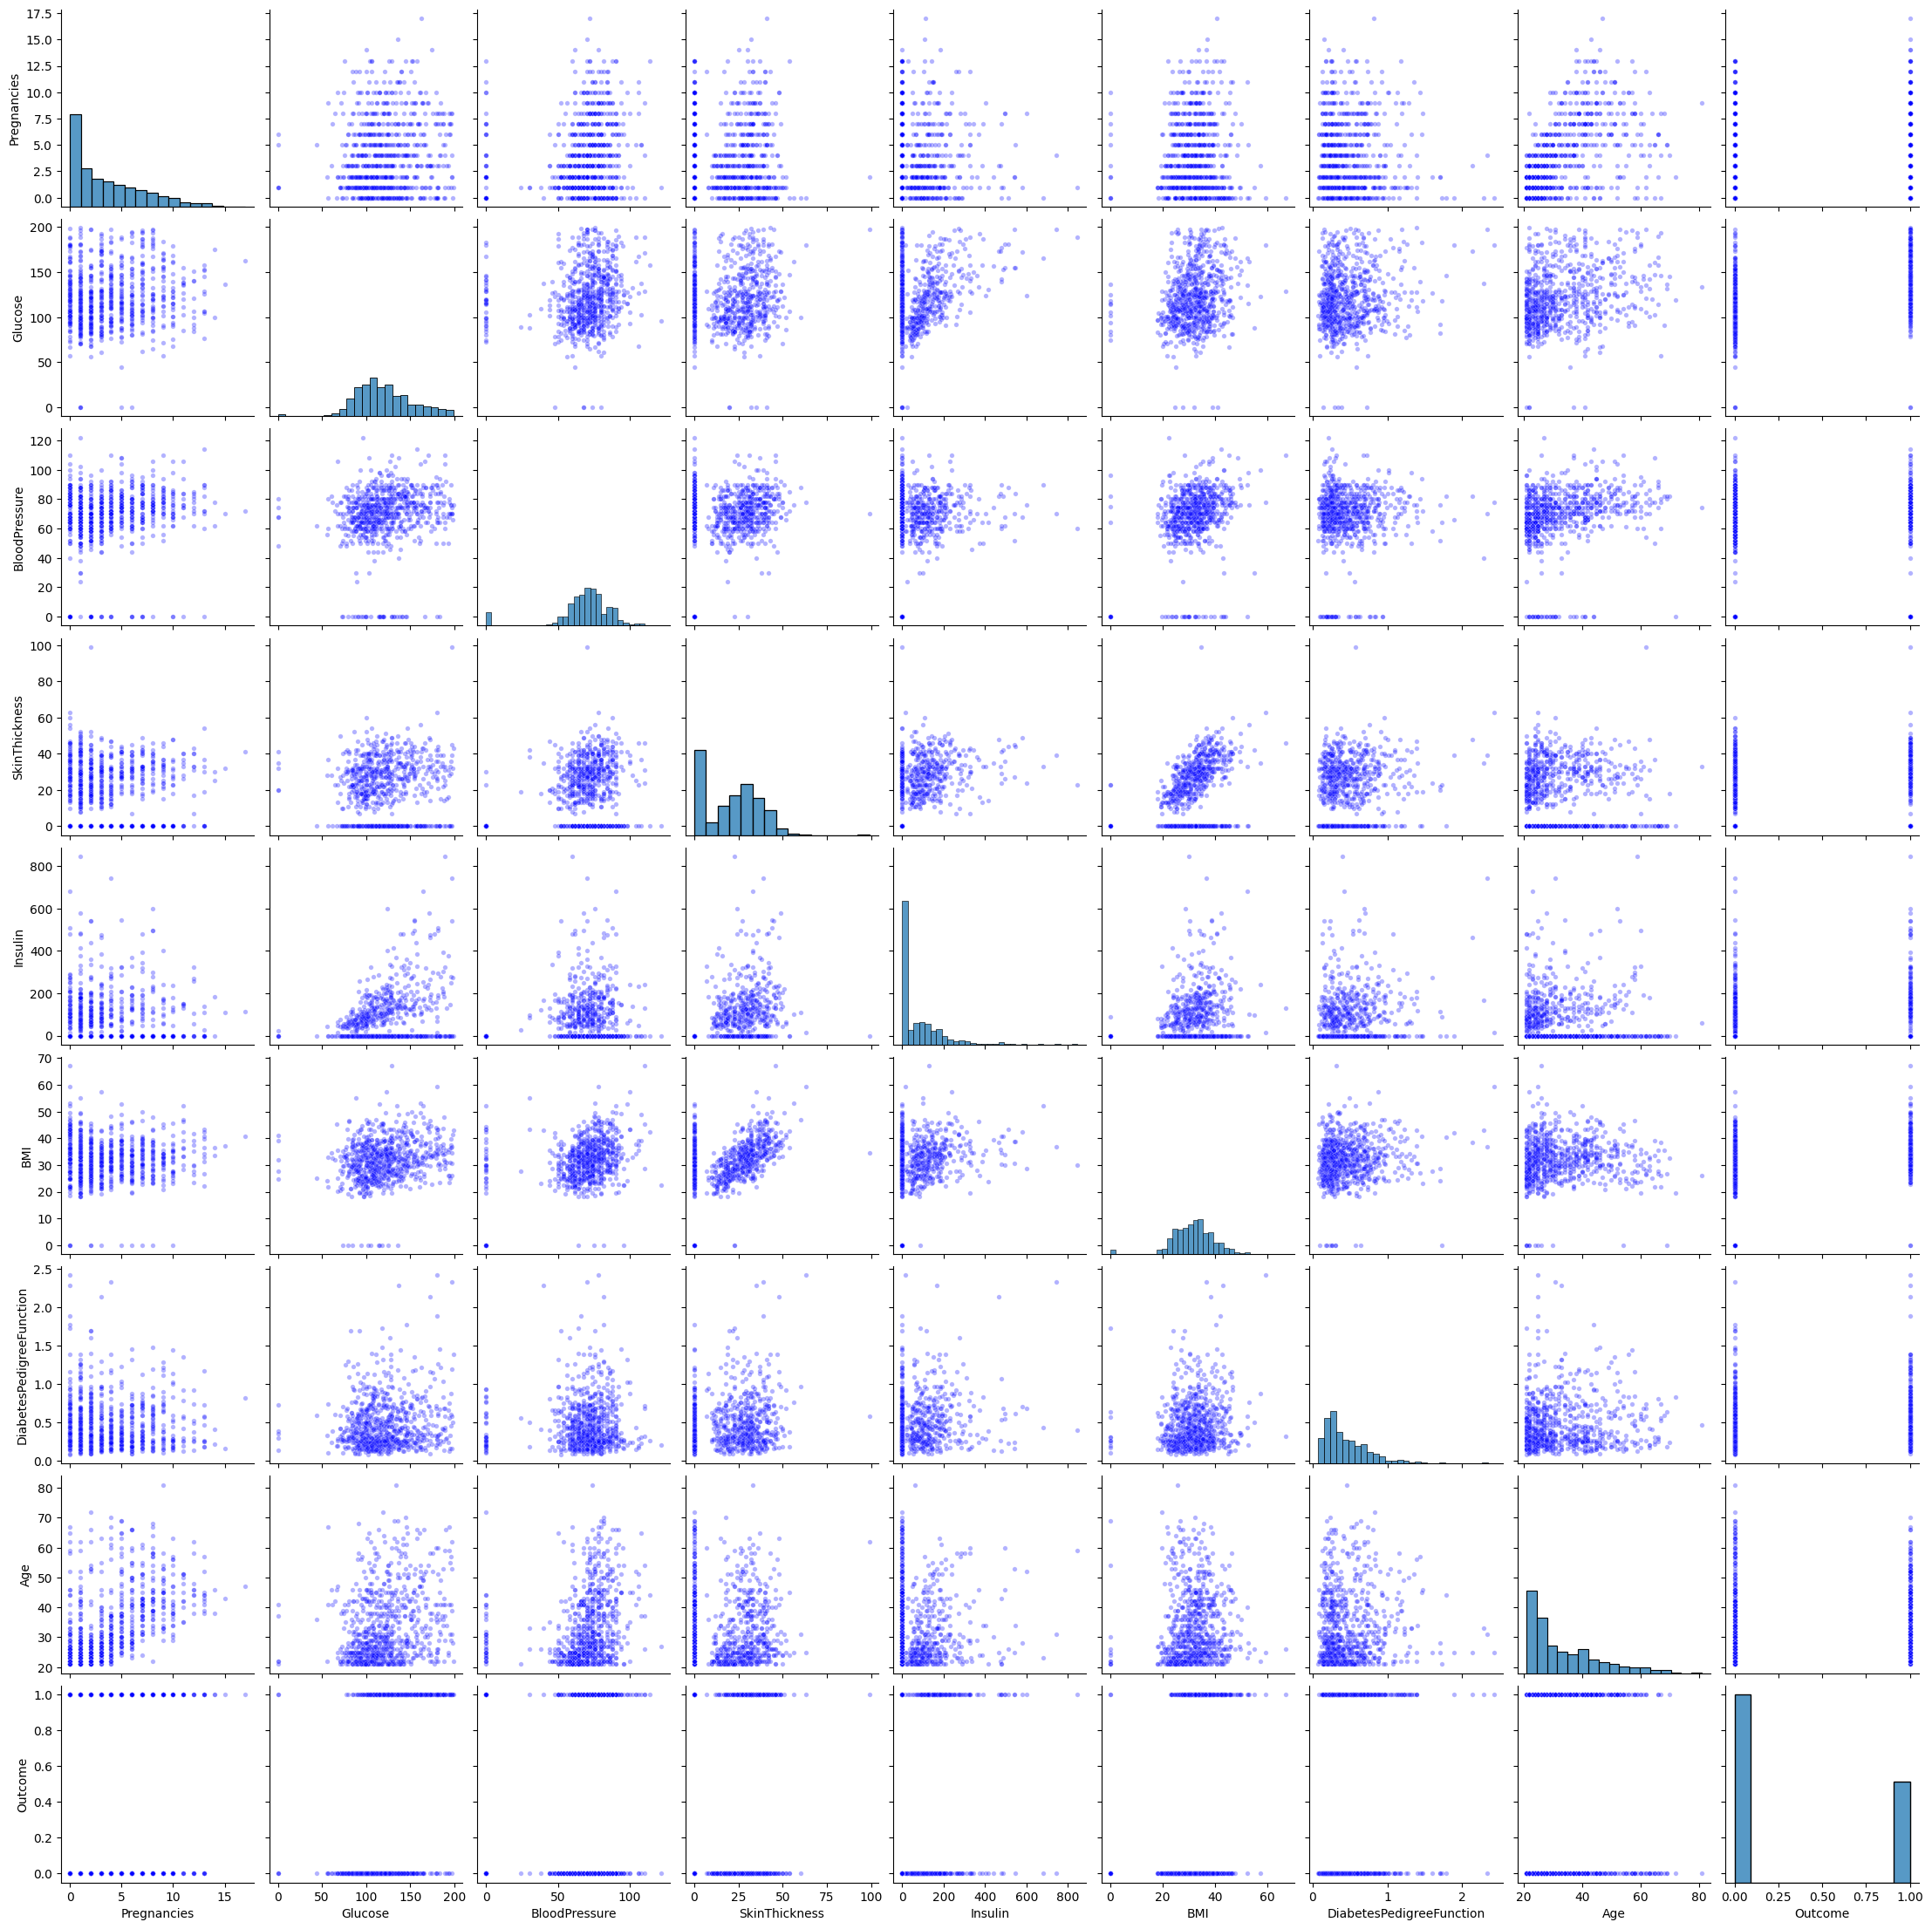

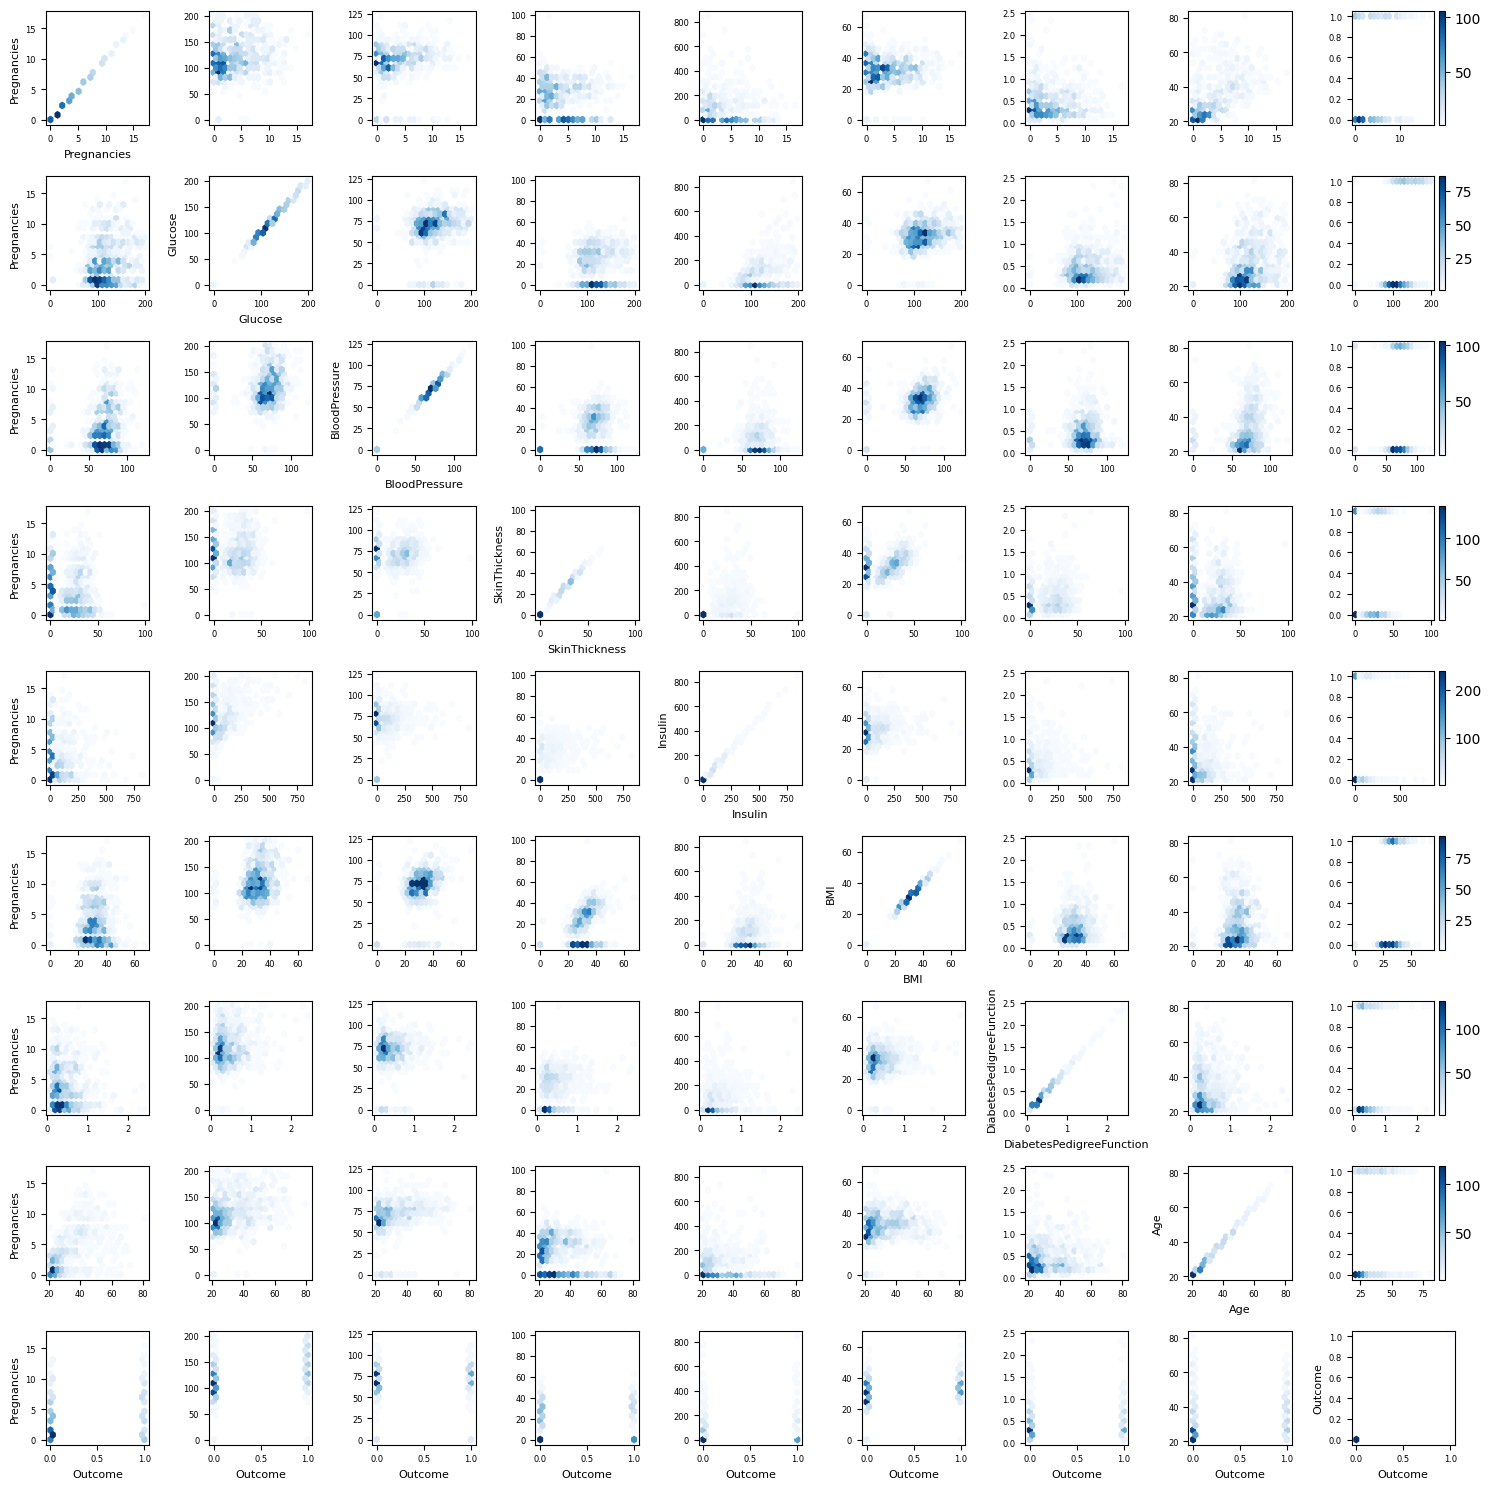

<Figure size 640x480 with 0 Axes>

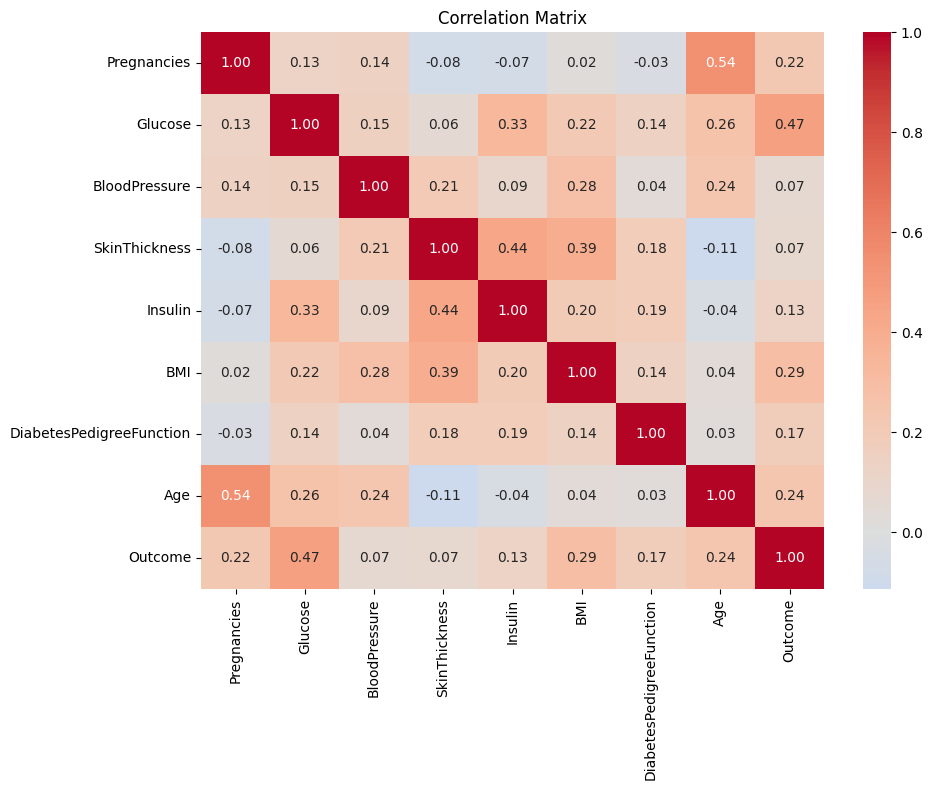


=== Custom Model Metrics ===
F1-score:    0.6618

=== Sklearn Model Metrics ===
F1-score:    0.6549


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('diabetes.csv').drop_duplicates()

sns.pairplot(data, 
             plot_kws={'alpha':0.3, 'color':'blue', 's':15})
plt.show()

features = data.columns
n = len(features)

fig, axs = plt.subplots(n, n, figsize=(15, 15))

for i in range(n):
    for j in range(n):
        if i == j:
            hb = axs[i,j].hexbin(data[features[i]], data[features[i]], 
                               gridsize=20, cmap='Blues', mincnt=1)
            axs[i,j].set_xlabel(features[i], fontsize=8)
            axs[i,j].set_ylabel(features[i], fontsize=8)
        else:
            hb = axs[i,j].hexbin(data[features[i]], data[features[j]], 
                               gridsize=20, cmap='Blues', mincnt=1)
            if j == n-1:
                plt.colorbar(hb, ax=axs[i,j])
        
        if i == n-1:
            axs[i,j].set_xlabel(features[i], fontsize=8)
        if j == 0 and i != j:
            axs[i,j].set_ylabel(features[j], fontsize=8)
        
        axs[i,j].tick_params(labelsize=6)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin

class MyLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-4, fit_intercept=True):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.fit_intercept = fit_intercept
        self.theta = None
        self.loss_history = []
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def _log_likelihood(self, X, y):
        z = np.dot(X, self.theta)
        return np.sum(y * z - np.log(1 + np.exp(z)))
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.max_iter):
            z = np.dot(X, self.theta)
            h = self._sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            prev_theta = self.theta.copy()
            
            self.theta -= self.learning_rate * gradient
            
            self.loss_history.append(self._log_likelihood(X, y))
            
            if np.linalg.norm(self.theta - prev_theta) < self.tol:
                break
    
    def predict_proba(self, X):
        if self.fit_intercept:
            X = self._add_intercept(X)
        return self._sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2, random_state=42)

model = MyLogisticRegression(learning_rate=0.001, max_iter=10000)
model.fit(X_train, y_train)
sklearn_model = LogisticRegression(
    max_iter=10000,
    random_state=42
)
sklearn_model.fit(X_train, y_train)

custom_preds = model.predict(X_test)
sklearn_preds = sklearn_model.predict(X_test)

print("\n=== Custom Model Metrics ===")
print(f"F1-score:    {f1_score(y_test, custom_preds):.4f}")

print("\n=== Sklearn Model Metrics ===")
print(f"F1-score:    {f1_score(y_test, sklearn_preds):.4f}")